In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\asus 1\Desktop\Fliprobo\Machine learning projects\Automobile_insurance_fraud.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
df.duplicated('policy_number').sum()

0

In [6]:
df.isin(['?']).sum().any()

True

In [7]:
df=df.replace('?',np.NaN)

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
df.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True)

In [10]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

In [11]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

In [12]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [13]:
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

In [14]:
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [15]:
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [16]:
df['CSL_Personal']=df.policy_csl.str.split('/', expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/', expand=True)[1]

In [17]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year,CSL_Personal,CSL_Accidental
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2004,Y,17,10,2014,25,1,2015,250,500
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,2007,Y,27,6,2006,21,1,2015,250,500
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,2007,N,9,6,2000,22,2,2015,100,300
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2014,Y,25,5,1990,1,10,2015,250,500
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,2009,N,6,6,2014,17,2,2015,500,1000


In [18]:
df.drop(['incident_year'],axis=1,inplace=True)

In [19]:
df['Automobile_Age']=2015 - df['auto_year']
df.drop("auto_year",axis=1,inplace=True)

In [20]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,...,52761.94000,7433.420000,7399.570000,37928.950000,15.448000,6.559000,2001.604000,13.08400,3.407000,9.897000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,...,26401.53319,4880.951853,4824.726179,18886.252893,8.850176,3.391758,7.360391,10.44318,3.276291,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,...,100.00000,0.000000,0.000000,70.000000,1.000000,1.000000,1990.000000,1.00000,1.000000,0.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,...,41812.50000,4295.000000,4445.000000,30292.500000,8.000000,4.000000,1995.000000,2.00000,1.000000,5.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,...,58055.00000,6775.000000,6750.000000,42100.000000,16.000000,7.000000,2002.000000,15.00000,2.000000,10.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,...,70592.50000,11305.000000,10885.000000,50822.500000,23.000000,9.000000,2008.000000,22.00000,5.000000,15.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,...,114920.00000,21450.000000,23670.000000,79560.000000,31.000000,12.000000,2015.000000,31.00000,12.000000,20.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [22]:
int_column = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available','auto_make','auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']
num_column= ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age', 'policy_annual_premium']

In [23]:
for i in int_column:
    print(i)
    print(df[i].value_counts())
    print("="*50)

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving 

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

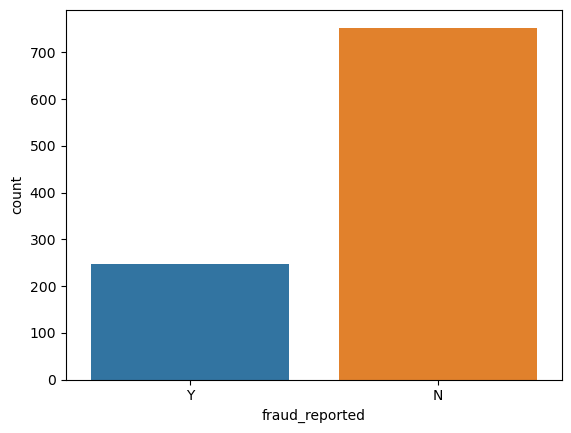

In [24]:
sns.countplot('fraud_reported',data=df)

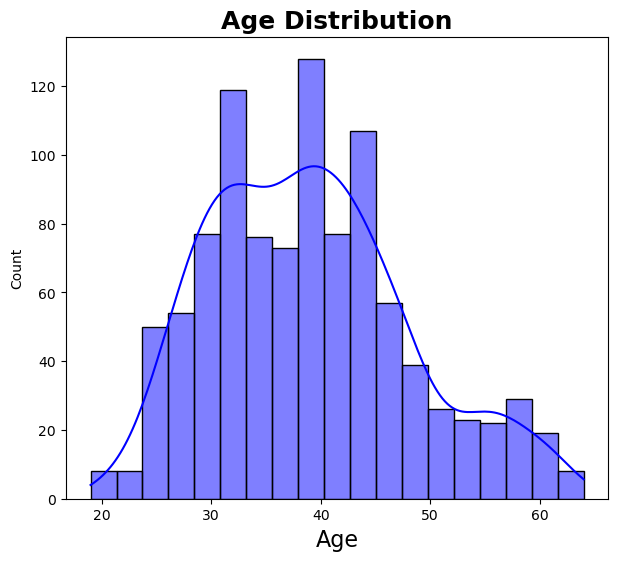

In [25]:
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

In [26]:
def age_group(x):
    if (11 < x < 21):
        return "11-20"
    if (21 < x < 31):
        return "21-30"
    if (31 < x < 41):
        return "31-40"
    if (41 < x < 51):
        return '41-50'
    if (51 < x < 61):
        return '51-60'
    if (61 < x < 71):
        return "61-70"
    else :
        return 'Greater Than 70'
    
df['age_group']=df['age'].apply(age_group)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,CSL_Personal,CSL_Accidental,Automobile_Age,age_group
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,Y,17,10,2014,25,1,250,500,11,41-50
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,Y,27,6,2006,21,1,250,500,8,41-50
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,N,9,6,2000,22,2,100,300,8,21-30
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,Y,25,5,1990,1,10,250,500,1,Greater Than 70
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,N,6,6,2014,17,2,500,1000,6,41-50


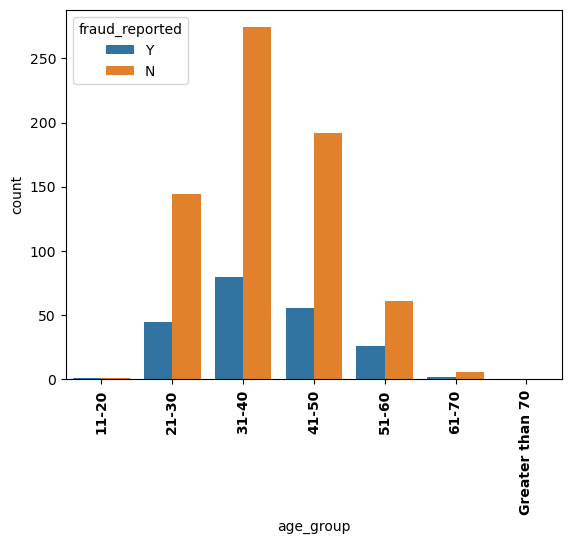

In [27]:
sequence=['11-20', '21-30', '31-40', '41-50','51-60', '61-70', 'Greater than 70'] 
sns.countplot(df['age_group'], hue=df['fraud_reported'], order=sequence)
plt.xticks(fontsize=10,fontweight ='bold',rotation=90)
plt.show()

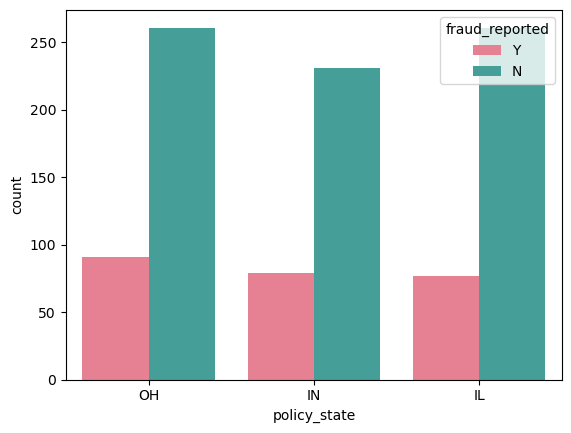

In [28]:
sns.countplot(df['policy_state'], hue=df['fraud_reported'], palette='husl')
plt.show()

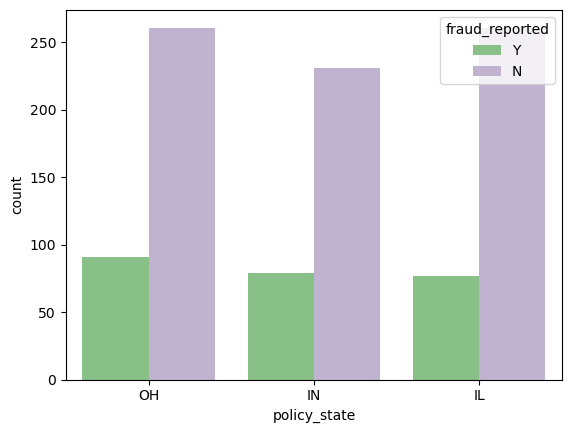

In [29]:
sns.countplot(df['policy_state'], hue=df['fraud_reported'], palette='Accent')
plt.show()

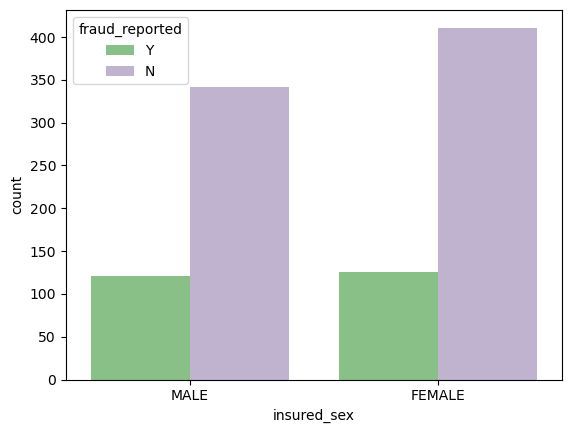

In [30]:
sns.countplot(df['insured_sex'], hue=df['fraud_reported'], palette='Accent')
plt.show()

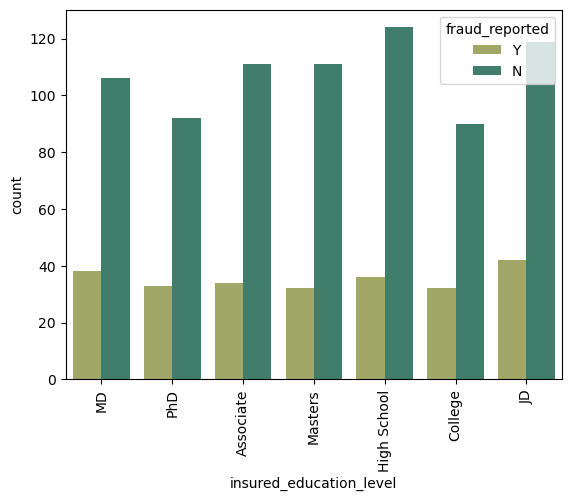

In [31]:
sns.countplot(df['insured_education_level'], hue=df['fraud_reported'], palette='gist_earth_r')
plt.xticks(rotation=90)
plt.show()

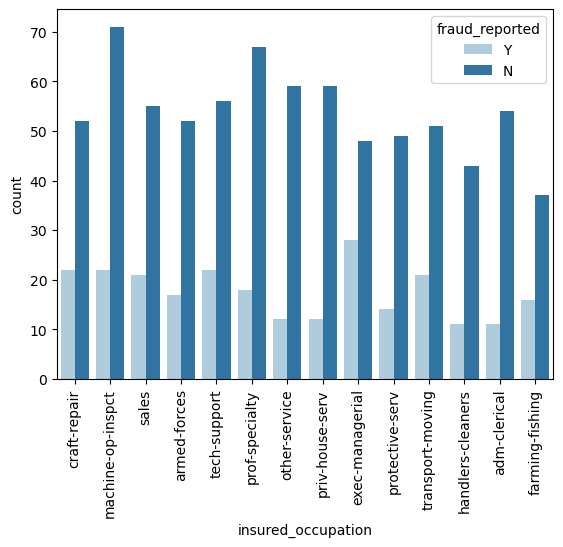

In [32]:
sns.countplot(df['insured_occupation'], hue=df['fraud_reported'], palette='Paired')
plt.xticks(rotation=90)
plt.show()

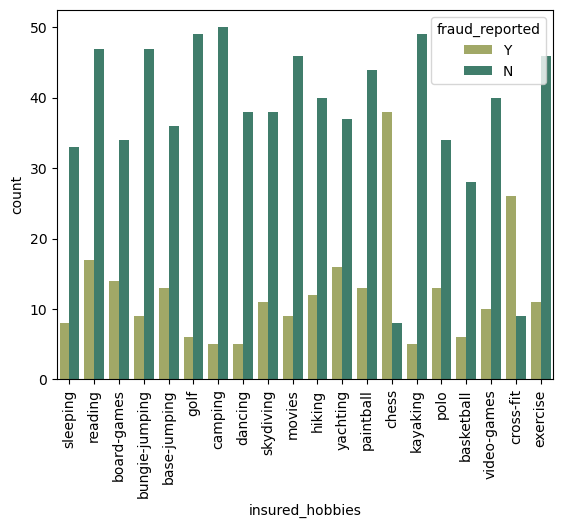

In [33]:
sns.countplot(df['insured_hobbies'], hue=df['fraud_reported'], palette='gist_earth_r')
plt.xticks(rotation=90)
plt.show()

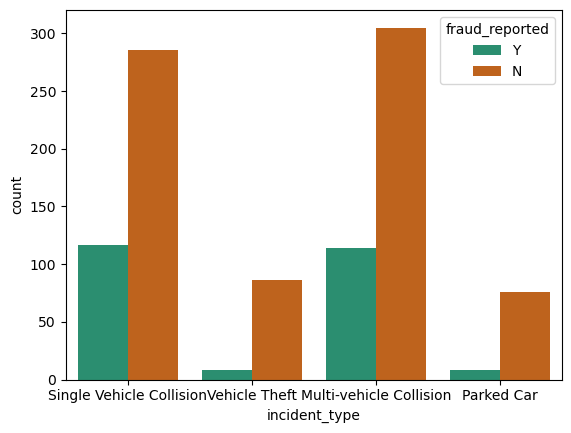

In [34]:
sns.countplot(df['incident_type'], hue=df['fraud_reported'], palette='Dark2')
plt.show()

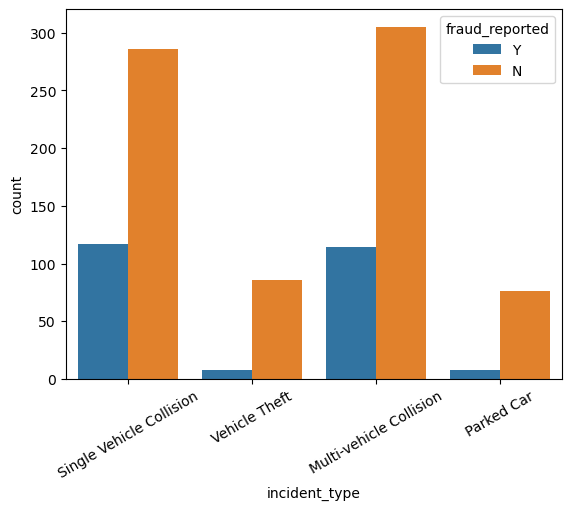

In [35]:
sns.countplot(df['incident_type'], hue= df['fraud_reported'], data=df)
plt.xticks(rotation=30)
plt.show()

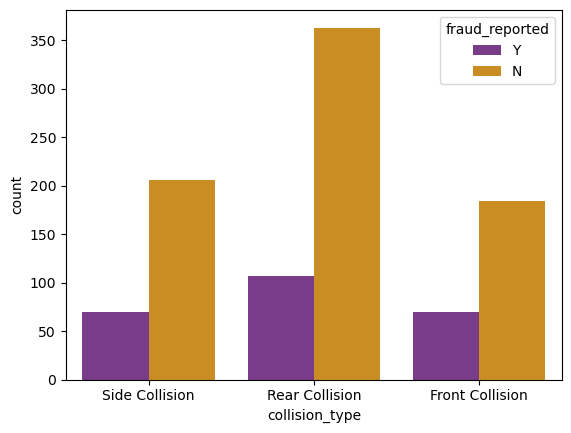

In [36]:
sns.countplot(df['collision_type'], hue=df['fraud_reported'], palette='CMRmap')
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in int_column:
    df[i] = le.fit_transform(df[i])
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,CSL_Personal,CSL_Accidental,Automobile_Age,age_group
0,328,48,2,250/500,1000,1406.91,0,1,4,2,...,1,17,10,2014,25,1,1,2,11,41-50
1,228,42,1,250/500,2000,1197.22,5000000,1,4,6,...,1,27,6,2006,21,1,1,2,8,41-50
2,134,29,2,100/300,2000,1413.14,5000000,0,6,11,...,0,9,6,2000,22,2,0,1,8,21-30
3,256,41,0,250/500,2000,1415.74,6000000,0,6,1,...,1,25,5,1990,1,10,1,2,1,Greater Than 70
4,228,44,0,500/1000,1000,1583.91,6000000,1,0,11,...,0,6,6,2014,17,2,2,0,6,41-50


In [38]:
df.drop(['age_group'], axis=1, inplace=True)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_model,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,CSL_Personal,CSL_Accidental,Automobile_Age
0,328,48,2,250/500,1000,1406.91,0,1,4,2,...,1,1,17,10,2014,25,1,1,2,11
1,228,42,1,250/500,2000,1197.22,5000000,1,4,6,...,12,1,27,6,2006,21,1,1,2,8
2,134,29,2,100/300,2000,1413.14,5000000,0,6,11,...,30,0,9,6,2000,22,2,0,1,8
3,256,41,0,250/500,2000,1415.74,6000000,0,6,1,...,34,1,25,5,1990,1,10,1,2,1
4,228,44,0,500/1000,1000,1583.91,6000000,1,0,11,...,31,0,6,6,2014,17,2,2,0,6


In [39]:
df.drop(['policy_csl'], axis=1, inplace=True)

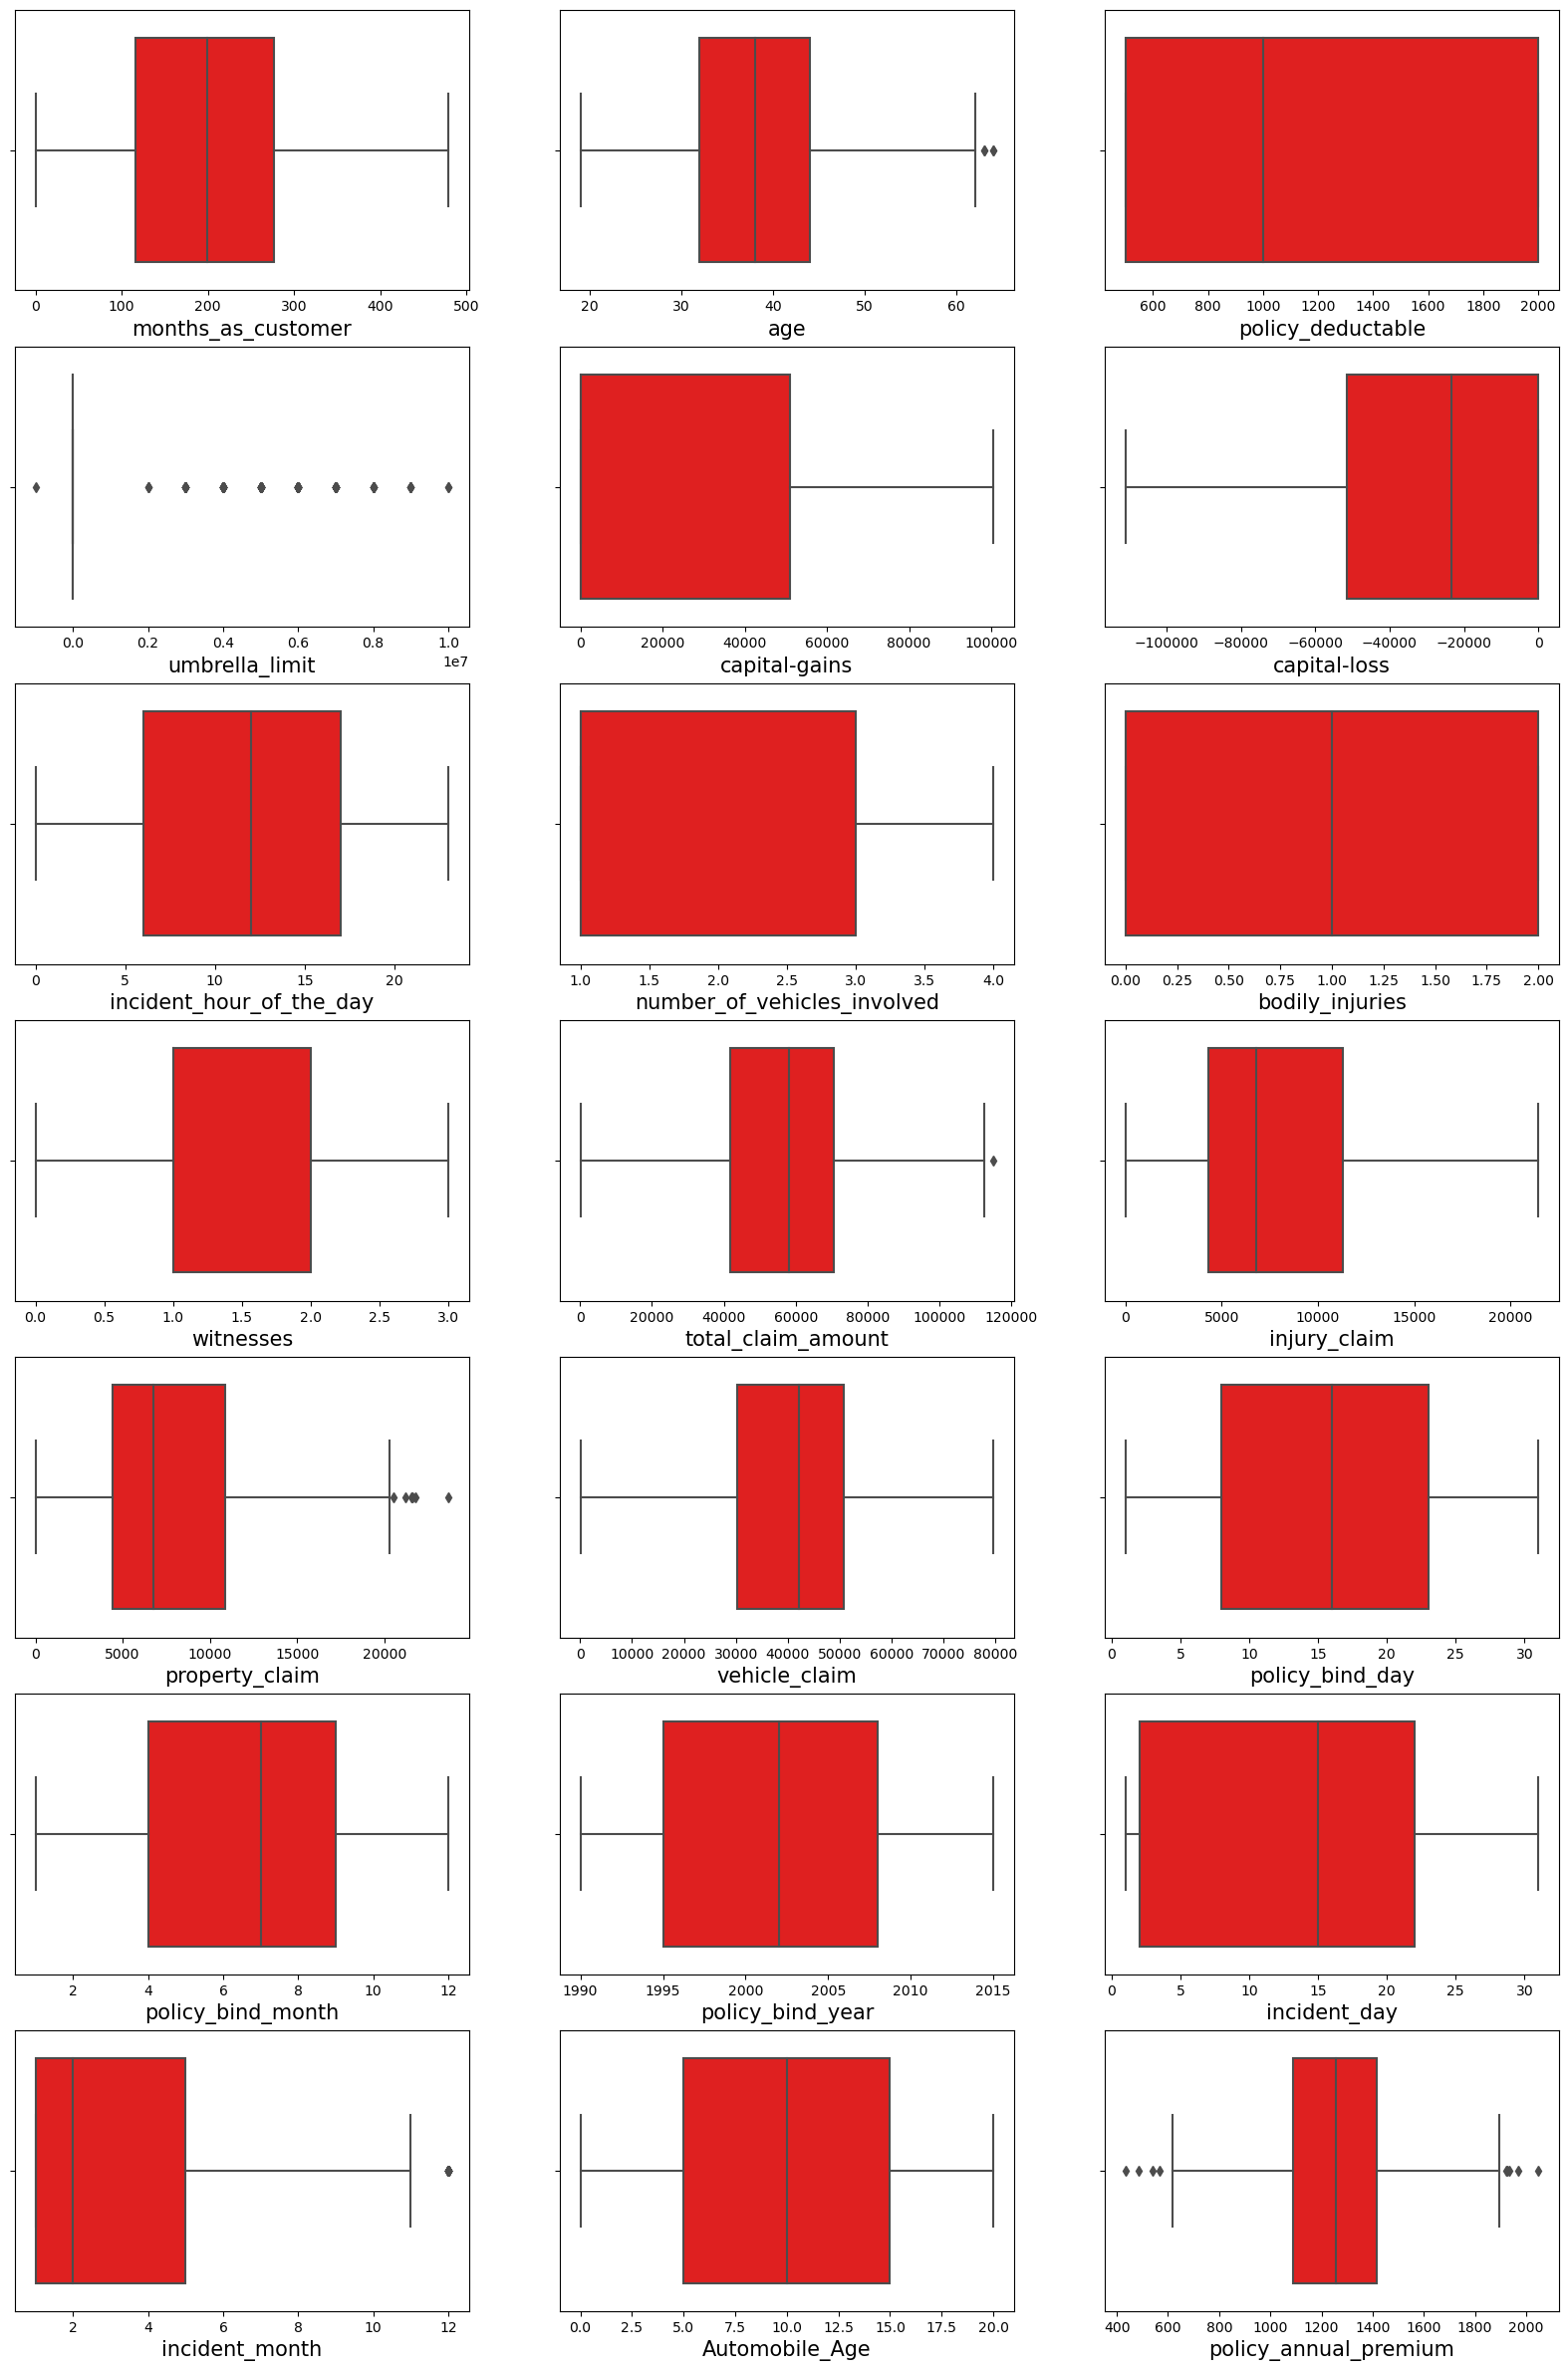

In [40]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in num_column:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [41]:
df[num_column].skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
policy_bind_day                0.024372
policy_bind_month             -0.029321
policy_bind_year               0.052511
incident_day                   0.059111
incident_month                 1.375894
Automobile_Age                 0.048289
policy_annual_premium          0.004402
dtype: float64

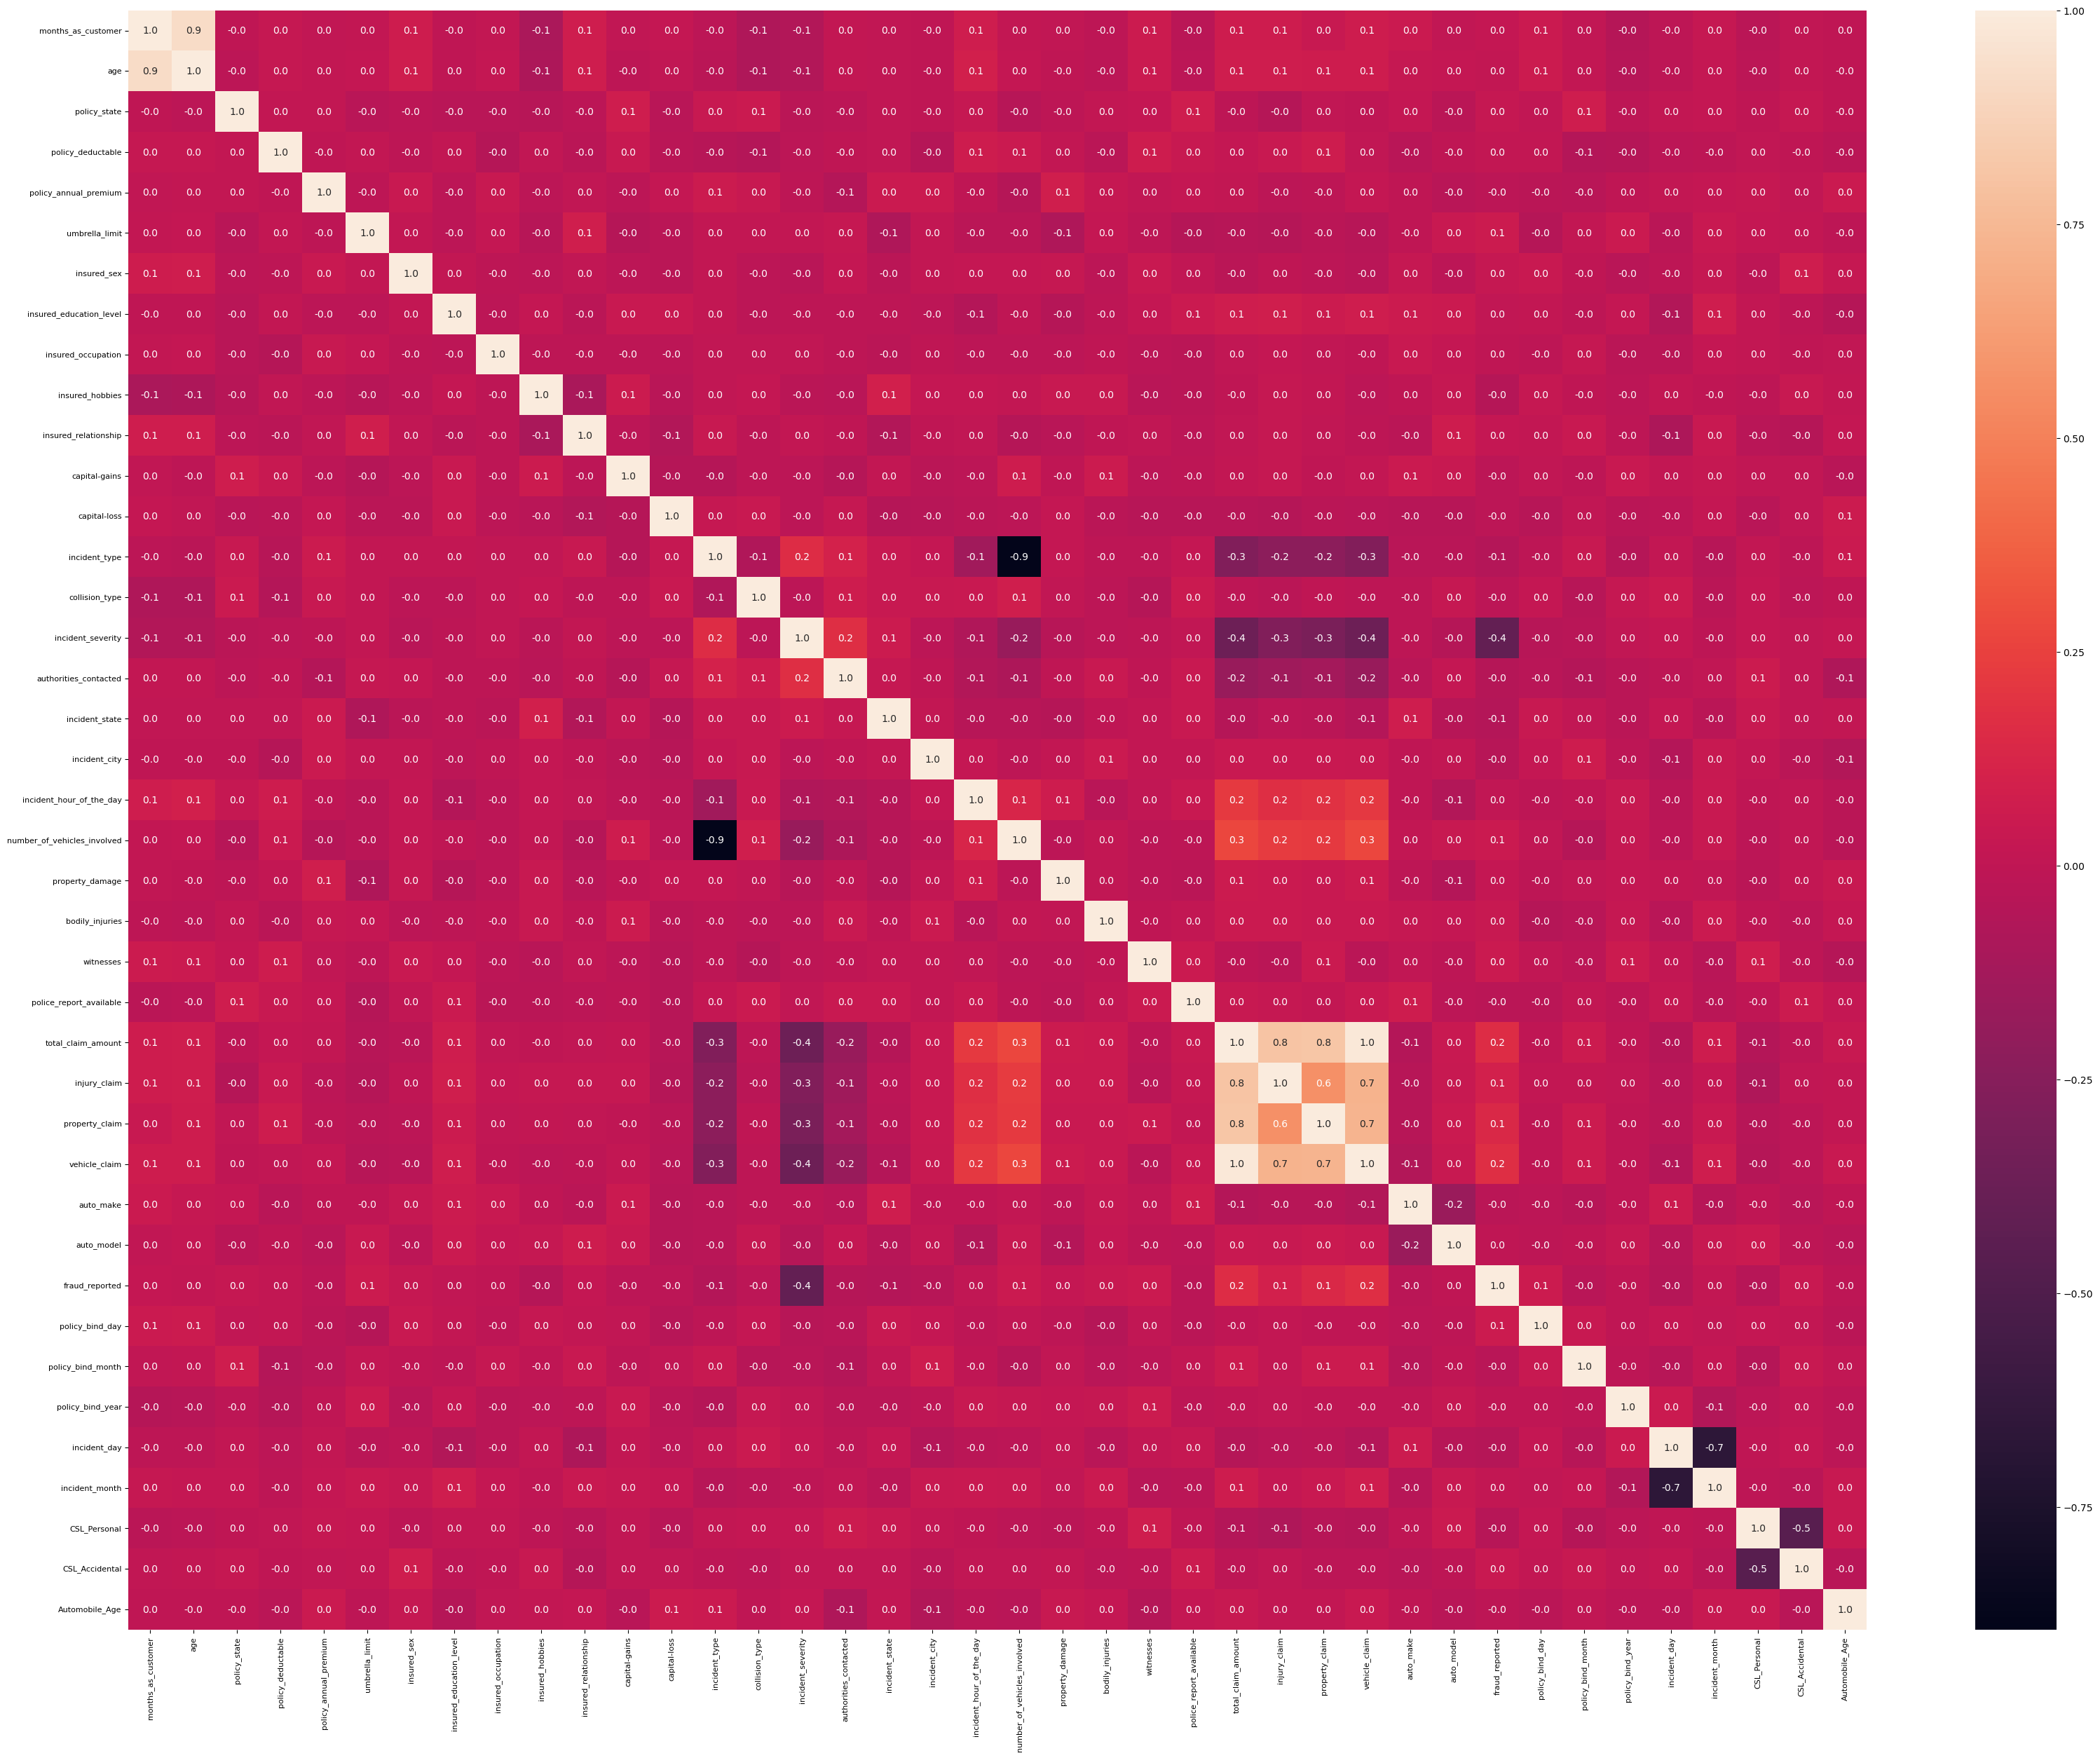

In [42]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), annot=True, fmt='0.1f')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [43]:
X = df.drop(['fraud_reported'], axis =1)
y = df['fraud_reported']

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [45]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 39) (200, 39) (800,) (200,)


In [46]:
max_acc=0
best_ran_st=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>max_acc:
        max_acc=acc
        best_ran_st=i
        
print(max_acc ,best_ran_st)

0.825 190


In [47]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=190)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 39) (200, 39) (800,) (200,)


# LOGISTIC REGRESSION

In [48]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred=logreg.predict(X_test)
logreg_acc_score = accuracy_score(y_test, logreg_pred)
logreg_f1_score = f1_score(y_test, logreg_pred)
logreg_con_mat=confusion_matrix(y_test, logreg_pred)
logreg_cl_report=classification_report(y_test, logreg_pred)
logreg_cv_score = cross_val_score(logreg, X, y, cv =5)
logreg_mean_cv_score=logreg_cv_score.mean()
print(logreg_acc_score )
print(logreg_f1_score )
print(logreg_con_mat)
print(logreg_cl_report)
print(logreg_mean_cv_score)

0.825
0.10256410256410256
[[163   3]
 [ 32   2]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       166
           1       0.40      0.06      0.10        34

    accuracy                           0.82       200
   macro avg       0.62      0.52      0.50       200
weighted avg       0.76      0.82      0.77       200

0.748


# Random Forest Classifier

In [49]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)
rfc_acc_score=accuracy_score(y_test, rfc_pred)
rfc_con_mat=confusion_matrix(y_test, rfc_pred)
rfc_cl_report=classification_report(y_test, rfc_pred)
rfc_cv_score = cross_val_score(rfc, X, y, cv =5)
rfc_f1_score = f1_score(y_test, rfc_pred)
rfc_mean_cv_score=rfc_cv_score.mean()
print(rfc_acc_score)
print(rfc_f1_score)
print(rfc_mean_cv_score)
print(rfc_con_mat)
print(rfc_cl_report)

0.785
0.35820895522388063
0.762
[[145  21]
 [ 22  12]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       166
           1       0.36      0.35      0.36        34

    accuracy                           0.79       200
   macro avg       0.62      0.61      0.61       200
weighted avg       0.78      0.79      0.78       200



# Decision Tree Classifier

In [50]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred=dtc.predict(X_test)
dtc_acc_score = accuracy_score(y_test, dtc_pred)
dtc_con_mat=confusion_matrix(y_test, dtc_pred)
dtc_cl_report=classification_report(y_test, dtc_pred)
dtc_cv_score = cross_val_score(dtc, X, y, cv =5)
dtc_f1_score = f1_score(y_test, dtc_pred)
dtc_mean_cv_score=dtc_cv_score.mean()
print(dtc_acc_score)
print(dtc_f1_score)
print(dtc_mean_cv_score)
print(dtc_con_mat)
print(dtc_cl_report)

0.805
0.5063291139240507
0.767
[[141  25]
 [ 14  20]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       166
           1       0.44      0.59      0.51        34

    accuracy                           0.81       200
   macro avg       0.68      0.72      0.69       200
weighted avg       0.83      0.81      0.82       200



# Gradient Boosting Classifier

In [51]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred=gbc.predict(X_test)
gbc_acc_score = accuracy_score(y_test, gbc_pred)
gbc_con_mat=confusion_matrix(y_test, gbc_pred)
gbc_cl_report=classification_report(y_test, gbc_pred)
gbc_cv_score = cross_val_score(gbc, X, y, cv =5)
gbc_f1_score = f1_score(y_test, gbc_pred)
gbc_mean_cv_score=gbc_cv_score.mean()
print(gbc_acc_score)
print(gbc_f1_score)
print(gbc_mean_cv_score)
print(gbc_con_mat)
print(gbc_cl_report)

0.815
0.54320987654321
0.8099999999999999
[[141  25]
 [ 12  22]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       166
           1       0.47      0.65      0.54        34

    accuracy                           0.81       200
   macro avg       0.69      0.75      0.71       200
weighted avg       0.84      0.81      0.83       200



# Gaussian Naives Bayes

In [52]:
gnb=GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred=gnb.predict(X_test)
gnb_acc_score = accuracy_score(y_test, gnb_pred)
gnb_con_mat=confusion_matrix(y_test, gnb_pred)
gnb_cl_report=classification_report(y_test, gnb_pred)
gnb_cv_score = cross_val_score(gnb, X, y, cv =5)
gnb_f1_score = f1_score(y_test, gnb_pred)
gnb_mean_cv_score=gnb_cv_score.mean()
print(gnb_acc_score)
print(gnb_f1_score)
print(gnb_mean_cv_score)
print(gnb_con_mat)
print(gnb_cl_report)

0.625
0.3119266055045871
0.678
[[108  58]
 [ 17  17]]
              precision    recall  f1-score   support

           0       0.86      0.65      0.74       166
           1       0.23      0.50      0.31        34

    accuracy                           0.62       200
   macro avg       0.55      0.58      0.53       200
weighted avg       0.76      0.62      0.67       200



# Support Vector

In [53]:
svm=SVC()
svm.fit(X_train, y_train)
svm_pred=svm.predict(X_test)
svm_acc_score = accuracy_score(y_test, svm_pred)
svm_con_mat=confusion_matrix(y_test, svm_pred)
svm_cl_report=classification_report(y_test, svm_pred)
svm_cv_score = cross_val_score(svm, X, y, cv =5)
svm_f1_score = f1_score(y_test, svm_pred)
svm_mean_cv_score=svm_cv_score.mean()
print(svm_acc_score)
print(svm_f1_score)
print(svm_mean_cv_score)
print(svm_con_mat)
print(svm_cl_report)

0.83
0.0
0.7529999999999999
[[166   0]
 [ 34   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       166
           1       0.00      0.00      0.00        34

    accuracy                           0.83       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.69      0.83      0.75       200



# STOCHASTIC GRADIENT CLASSIFIER

In [54]:
sgd=SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred=sgd.predict(X_test)
sgd_acc_score = accuracy_score(y_test, sgd_pred)
sgd_con_mat=confusion_matrix(y_test, sgd_pred)
sgd_cl_report=classification_report(y_test, sgd_pred)
sgd_cv_score = cross_val_score(sgd, X, y, cv =5)
sgd_f1_score = f1_score(y_test, sgd_pred)
sgd_mean_cv_score=sgd_cv_score.mean()
print(sgd_acc_score)
print(sgd_f1_score)
print(sgd_mean_cv_score)
print(sgd_con_mat)
print(sgd_cl_report)

0.83
0.15
0.635
[[163   3]
 [ 31   3]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       166
           1       0.50      0.09      0.15        34

    accuracy                           0.83       200
   macro avg       0.67      0.54      0.53       200
weighted avg       0.78      0.83      0.78       200



# Ada Boost Classifier

In [55]:
adc=AdaBoostClassifier()
adc.fit(X_train, y_train)
adc_pred=adc.predict(X_test)
adc_acc_score = accuracy_score(y_test, adc_pred)
adc_con_mat=confusion_matrix(y_test, adc_pred)
adc_cl_report=classification_report(y_test, adc_pred)
adc_cv_score = cross_val_score(adc, X, y, cv =5)
adc_f1_score = f1_score(y_test, adc_pred)
adc_mean_cv_score=adc_cv_score.mean()
print(adc_acc_score)
print(adc_f1_score)
print(adc_mean_cv_score)
print(adc_con_mat)
print(adc_cl_report)

0.805
0.48
0.793
[[143  23]
 [ 16  18]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       166
           1       0.44      0.53      0.48        34

    accuracy                           0.81       200
   macro avg       0.67      0.70      0.68       200
weighted avg       0.82      0.81      0.81       200



In [56]:
model_pf=pd.DataFrame({'Models':['Logistic Regression', 'Random Forest Classifier', 'Decision Tree', 'Gradient Boosting Classifier', 'Gaussian Naive Bayes Classifier', 'Support Vector Classifier', 'Stochastic Gradient Descent', 'AdaBoost Classifier'], 'Accuracy Score' : [logreg_acc_score, rfc_acc_score,  dtc_acc_score, gbc_acc_score, gnb_acc_score, svm_acc_score, sgd_acc_score, adc_acc_score], 'CV Score' : [logreg_mean_cv_score, rfc_mean_cv_score,  dtc_mean_cv_score, gbc_mean_cv_score, gnb_mean_cv_score, svm_mean_cv_score, sgd_mean_cv_score, adc_mean_cv_score]})
model_pf

,Models,Accuracy Score,CV Score
0,Logistic Regression,0.825,0.748
1,Random Forest Classifier,0.785,0.762
2,Decision Tree,0.805,0.767
3,Gradient Boosting Classifier,0.815,0.810
4,Gaussian Naive Bayes Classifier,0.625,0.678
5,Support Vector Classifier,0.830,0.753
6,Stochastic Gradient Descent,0.830,0.635
7,AdaBoost Classifier,0.805,0.793


In [57]:
#Gradient Boosting and Support Vector are the best models